## 캐싱(Caching)

LangChain은 LLM을 위한 선택적 캐싱 레이어를 제공합니다.

이는 두 가지 이유로 유용합니다.

- 동일한 완료를 여러 번 요청하는 경우 LLM 공급자에 대한 **API 호출 횟수를 줄여 비용을 절감**할 수 있습니다.
- LLM 제공업체에 대한 **API 호출 횟수를 줄여 애플리케이션의 속도를 높일 수** 있습니다.

In [1]:
# API KEY를 환경변수로 관리하기 위한 설정 파일
from dotenv import load_dotenv

# API KEY 정보로드
load_dotenv()

True

In [ ]:
# LangSmith 추적을 설정합니다. https://smith.langchain.com
# !pip install langchain-teddynote
from langchain_teddynote import logging
 
# 프로젝트 이름을 입력합니다.
logging.langsmith("CH04-Models")

LangSmith 추적을 시작합니다.
[프로젝트명]
CH04-Models


모델과 프롬프트를 생성합니다


In [3]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import PromptTemplate

# 모델을 생성합니다.
llm = ChatOpenAI(model_name="gpt-3.5-turbo")

# 프롬프트를 생성합니다.
prompt = PromptTemplate.from_template("{country} 에 대해서 200자 내외로 요약해줘")

# 체인을 생성합니다.
chain = prompt | llm

In [4]:
%%time 
response = chain.invoke({"country": "한국"})
print(response.content)

한국은 동아시아에 위치한 고대 역사와 문화를 자랑하는 나라이다. 대한민국과 북한으로 나누어져 있으며, 주요 도시로는 서울, 부산, 인천 등이 있다. 한국은 전통적인 문화와 현대화가 공존하는 나라로, 한류 문화로 유명하며 K-pop, K-drama 등이 세계적으로 인기를 끌고 있다. 또한 한식이 세계적으로 인정받는 음식 문화를 갖추고 있으며, 고려 세계 문화유산으로 등재된 종묘, 경복궁, 창덕궁 등의 역사 유적지도 많이 보유하고 있다. 정책적으로는 정보통신 기술 발달이 빠르며, 글로벌 기업인 삼성, 현대 등이 성공적으로 성장하고 있다.
CPU times: total: 93.8 ms
Wall time: 2.23 s


![스크린샷 2025-08-19 141317.png](<attachment:스크린샷 2025-08-19 141317.png>)
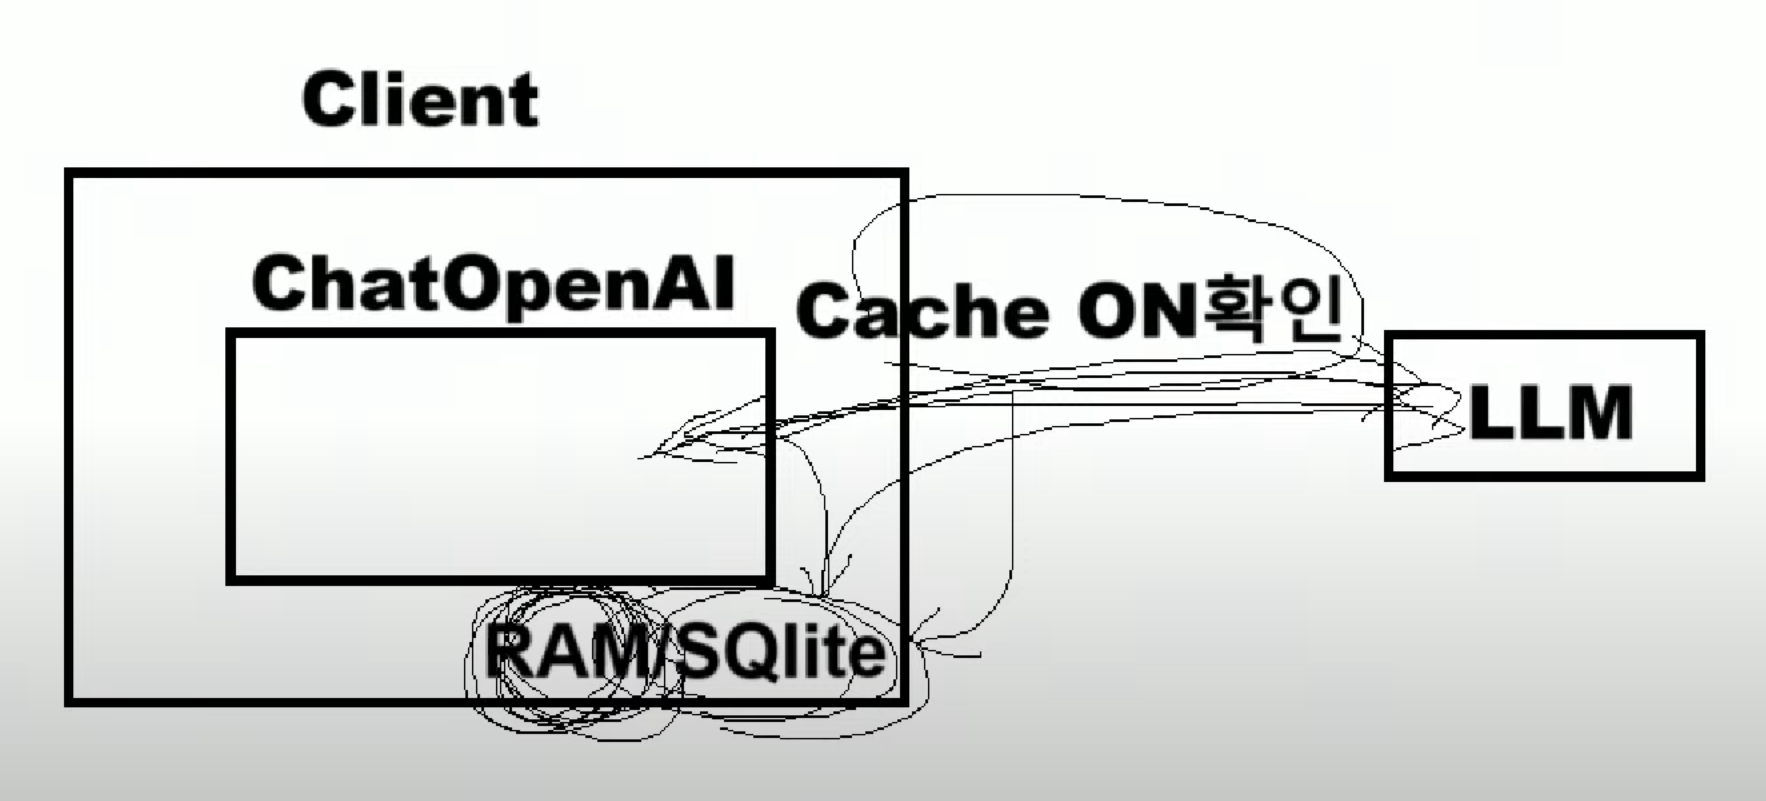

## InMemoryCache

인메모리 캐시를 사용하여 동일 질문에 대한 답변을 저장하고, 캐시에 저장된 답변을 반환합니다.

In [5]:
%%time
from langchain.globals import set_llm_cache
from langchain.cache import InMemoryCache

# 인메모리 캐시를 사용합니다.(RAM에 저장)
# 캐시를 사용하면 동일한 요청에 대해 빠른 응답을 받을 수 있습니다.
set_llm_cache(InMemoryCache())  # 한번만 실행!

# 체인을 실행합니다.
response = chain.invoke({"country": "한국"})
print(response.content)

한국은 동아시아에 위치한 고도 경제성장을 이룬 선진국가이다. 주요 산업으로는 반도체, 자동차, 선박, 철강 등이 있으며 세계적으로 유명한 기업들이 많이 있다. 한류 열풍으로 한국 음악, 영화, 드라마 등이 세계적으로 인기를 끌고 있다. 또한 역사적으로 다양한 문화유산과 전통 음식을 자랑하고 있으며, 아름다운 자연경관과 고즈넉한 전통 마을이 많이 있다. 한반도 분단으로 인해 북한과의 관계는 여전히 긴장 상태에 있지만, 최근 남북관계는 회복의 조짐을 보이고 있다. 현재는 글로벌한 영향력을 키워가며 세계에서 주목받는 나라로 발전하고 있다.
CPU times: total: 766 ms
Wall time: 3.24 s


In [ ]:
# 캐시가 활성화되었습니다.

%%time
# 체인을 실행합니다.
response = chain.invoke({"country": "한국"})
print(response.content)

한국은 동아시아에 위치한 고도 경제성장을 이룬 선진국가이다. 주요 산업으로는 반도체, 자동차, 선박, 철강 등이 있으며 세계적으로 유명한 기업들이 많이 있다. 한류 열풍으로 한국 음악, 영화, 드라마 등이 세계적으로 인기를 끌고 있다. 또한 역사적으로 다양한 문화유산과 전통 음식을 자랑하고 있으며, 아름다운 자연경관과 고즈넉한 전통 마을이 많이 있다. 한반도 분단으로 인해 북한과의 관계는 여전히 긴장 상태에 있지만, 최근 남북관계는 회복의 조짐을 보이고 있다. 현재는 글로벌한 영향력을 키워가며 세계에서 주목받는 나라로 발전하고 있다.
CPU times: total: 0 ns
Wall time: 2 ms


## SQLite Cache

캐시를 데이터베이스에 저장하는 방식.

In [ ]:
from langchain_community.cache import SQLiteCache
from langchain_core.globals import set_llm_cache
import os

# 캐시 디렉토리를 생성합니다.
if not os.path.exists("cache"):
    os.makedirs("cache")

# SQLiteCache를 사용합니다.
set_llm_cache(SQLiteCache(database_path="cache/llm_cache.db"))  # 캐시 삭제를 원하면 파일을 삭제하면 됨.

In [ ]:
%%time 
# 체인을 실행합니다.
response = chain.invoke({"country": "한국"})
print(response.content)